In [9]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd,os

In [8]:
log_dir = '../../Adversarial Heart Sound Results/logs/'
metrics = ['val_macc','val_F1','val_precision','val_sensitivity','val_specificity']

In [5]:
class Results():
    def __init__(self,log_name):
        self.log_name = log_name 
        self.df = None
        self.dft = None # Tuned result
        self.tune = False
        self.log_dir = '../../Adversarial Heart Sound Results/logs/'
        self.metrics = ['val_macc','val_F1','val_precision','val_sensitivity','val_specificity']
        self.read()
    def read(self):
        os.listdir(self.log_dir)
        wow = [x for x in os.listdir(self.log_dir) if self.log_name in x]
        how = [x.split(' ')[0] for x in wow]
        now = list(set(how))
        now.sort()
        print("Log not tuned " ,wow[how.index(now[0])])
        self.df = pd.read_csv(self.log_dir+wow[how.index(now[0])]+'/training.csv')
        self.df.sort_values(by=['val_macc','val_F1'],ascending=False,inplace = True)
        self.df = dict(self.df.iloc[0][metrics])
        if(len(now)>1):
            print("Tuned log ",wow[how.index(now[1])])
            self.dft = pd.read_csv(self.log_dir+wow[how.index(now[1])]+'/training.csv')
            self.dft.sort_values(by=['val_macc','val_F1'],ascending=False,inplace = True)
            self.dft = dict(self.dft.iloc[0][metrics])
            self.tune = True
    def show(self,width = 0.35,figsize=(8,5)):
        x = np.arange(len(self.metrics))
        fig, ax = plt.subplots(figsize=figsize)
        labels = list(self.df.values())
        rect1 = ax.bar(x-width/2,labels,width,label='Results')
        self.autolabel(rect1,ax)
        title = "Trainer: " +self.log_name.split('_')[0]+"\n Tester: "+ self.log_name.split('_')[1]
        if(self.tune):
            labels2 = list(self.dft.values())
            rect2 = ax.bar(x+width/2,labels2,width,label='Tuned')
            self.autolabel(rect2,ax)
            title = title + "\nWith Tuning"
        ax.set_ylabel('Scores')
        ax.set_xticks(x)
        ax.set_title(title)
        ax.set_xticklabels(self.metrics)
        ax.legend()
        fig.tight_layout()
        plt.show()
        
    def autolabel(self,rects,ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

In [9]:
#### Show all log names 
[x.split(' ')[0] for x in os.listdir(log_dir)]

['abdfi_c',
 'abdf_c',
 'bcdfghi_a',
 'bcdfghi_a',
 'bcdfghi_a_tune_0.3',
 'bcdfi_a',
 'bcdf_a',
 'dann']

Log not tuned  bcdfghi_a 2019-09-24 22:26:47.695625
Tuned log  bcdfghi_a_tune_0.3 Tuned 30 2019-09-25 11:46:30.180240


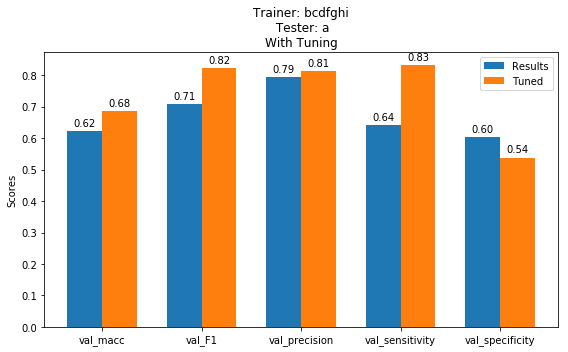

In [10]:
res = Results('bcdfghi_a')
res.show()

Log not tuned  abdf_c 2019-09-23 13:38:14.925635


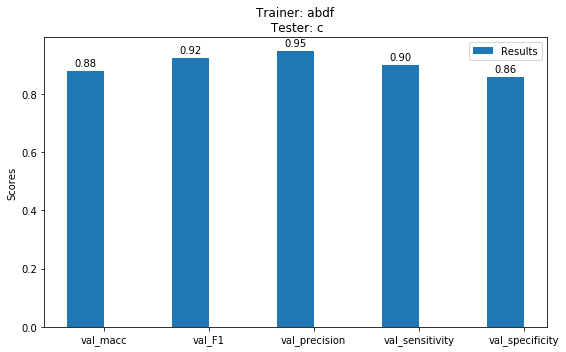

In [11]:
res = Results('abdf_c')
res.show()

In [7]:
from tkinter import *
from tkinter.filedialog import askopenfilename,askopenfilenames,askdirectory

In [10]:
root = Tk()
filename = askdirectory(initialdir=log_dir)
print(filename)
root.destroy()

/media/mhealthra2/Data/heart_sound/Adversarial Heart Sound Results/logs


In [11]:
help(askopenfilenames)

Help on function askopenfilenames in module tkinter.filedialog:

askopenfilenames(**options)
    Ask for multiple filenames to open
    
    Returns a list of filenames or empty list if
    cancel button selected



In [2]:
filename = askopenfilename(initialdir='../')
print(filename)

NameError: name 'root' is not defined